Code Word: DEV

In [1]:
!pip install roboticstoolbox-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp
import roboticstoolbox as rtb

# **Task 1**

In [3]:
def scara_invkin(x,y,z,d1,d2):
    # using formulae from the textbook
    r = abs((x**2+y**2-d1**2-d2**2)/(2*d1*d2))
    theta2 = np.arctan(np.sqrt(abs(1-r**2))/r)
    theta1 = np.arctan(y/x) - np.arctan((d2*np.sin(theta2))/(d1+d2*np.cos(theta2)))
    d3 = -z
    return theta1, theta2, d3

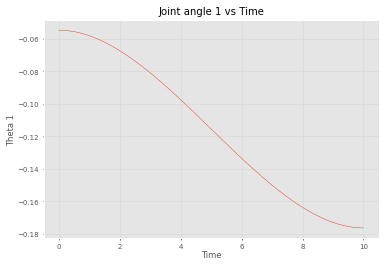

In [4]:
m1 = 1
m2 = 1
m3 = 1
d1 = 1
d2 = 1
d3 = 0
p = 1
J1 = (1/3)*m1*d1**2
J2 = (1/3)*m2*d2**2
J3 = (1/3)*m3*d3**2

A = [0.40,0.06,0.1] #initial point
B = [0.40,0.01,0.1] #final point

[theta1_i,theta2_i,d3_i] = scara_invkin(A[0],A[1],A[2],d1,d2) #initial joint variables
[theta1_f,theta2_f,d3_f] = scara_invkin(B[0],B[1],B[2],d1,d2) #final joint variables
[v1_i,v2_i,v3_i] = [0,0,0]
[v1_f,v2_f,v3_f] = [0,0,0]

#desired trajectory generation referred from textbook Section 8.2.1
to = 0
tf = 10

t = np.linspace(to,tf,tf*100)
c = [1]*len(t)

M = [[1,to,to**2,to**3],[0,1,2*to,3*to**2],[1,tf,tf**2,tf**3],[0,1,2*tf,3*tf**2]]

b1 = [theta1_i,v1_i,theta1_f,v1_f]
b2 = [theta2_i,v2_i,theta2_f,v2_f]
b3 = [d3_i,v1_i,d3_f,v1_f]

a1 = np.matmul(np.linalg.inv(M),b1)
a2 = np.matmul(np.linalg.inv(M),b2)
a3 = np.matmul(np.linalg.inv(M),b3)

#initialization
q1_d = [0]*len(t)
v1_d = [0]*len(t)
a1_d = [0]*len(t)

q2_d = [0]*len(t)
v2_d = [0]*len(t)
a2_d = [0]*len(t)

d3_d = [0]*len(t)
v3_d = [0]*len(t)
a3_d = [0]*len(t)

#desired end effector positions wrt time
x_d = [0]*len(t)
y_d = [0]*len(t)
z_d = [0]*len(t)

for i in range(len(t)):
  q1_d[i] = a1[0]*c[i] + a1[1]*t[i] +a1[2]*t[i]**2 + a1[3]*t[i]**3
  v1_d[i] = a1[1]*c[i] +2*a1[2]*t[i] +3*a1[3]*t[i]**2
  a1_d[i] = 2*a1[2]*c[i] + 6*a1[3]*t[i]

  q2_d[i] = a2[0]*c[i] + a2[1]*t[i] +a2[2]*t[i]**2 + a2[3]*t[i]**3
  v2_d[i] = a2[1]*c[i] +2*a2[2]*t[i] +3*a2[3]*t[i]**2
  a2_d[i] = 2*a2[2]*c[i] + 6*a2[3]*t[i]

  d3_d[i] = a3[0]*c[i] + a3[1]*t[i] +a3[2]*t[i]**2 + a3[3]*t[i]**3
  v3_d[i] = a3[1]*c[i] +2*a3[2]*t[i] +3*a3[3]*t[i]**2
  a3_d[i] = 2*a3[2]*c[i] + 6*a3[3]*t[i]

  x_d[i] = -p*np.sin(q1_d[i]) - d2*np.sin(q2_d[i])
  y_d[i] = p*np.cos(q1_d[i]) + d2*np.cos(q2_d[i])
  z_d[i] = d1 + d3_d[i]

plt.title("Joint angle 1 vs Time")
plt.xlabel("Time")
plt.ylabel("Theta 1")
plt.plot(t,q1_d)

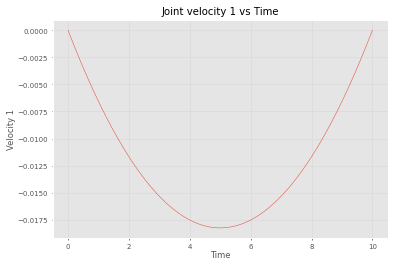

In [5]:
plt.title("Joint velocity 1 vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity 1")
plt.plot(t,v1_d)

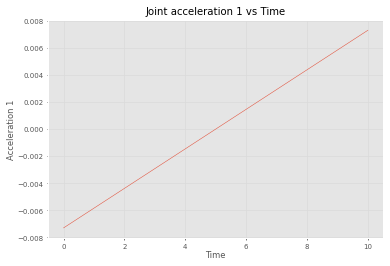

In [6]:
plt.title("Joint acceleration 1 vs Time")
plt.xlabel("Time")
plt.ylabel("Acceleration 1")
plt.plot(t,a1_d)

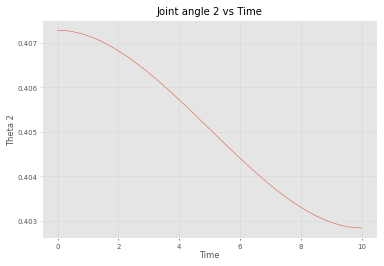

In [7]:
plt.title("Joint angle 2 vs Time")
plt.xlabel("Time")
plt.ylabel("Theta 2")
plt.plot(t,q2_d)

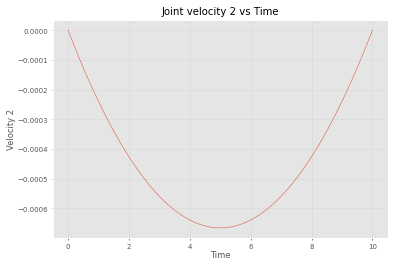

In [8]:
plt.title("Joint velocity 2 vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity 2")
plt.plot(t,v2_d)

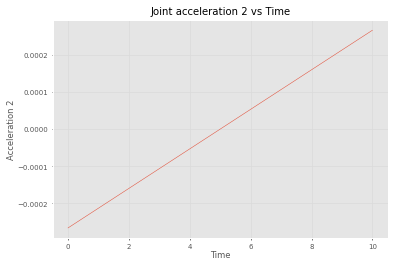

In [9]:
plt.title("Joint acceleration 2 vs Time")
plt.xlabel("Time")
plt.ylabel("Acceleration 2")
plt.plot(t,a2_d)

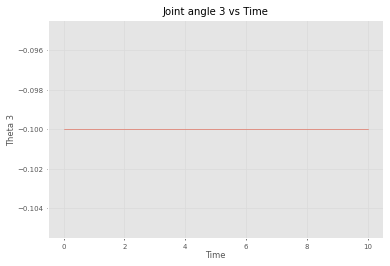

In [10]:
plt.title("Joint angle 3 vs Time")
plt.xlabel("Time")
plt.ylabel("Theta 3")
plt.plot(t,d3_d)

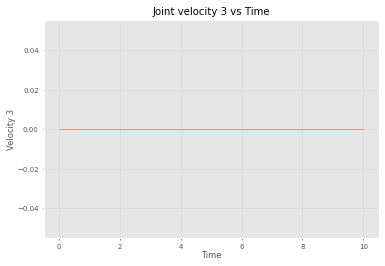

In [11]:
plt.title("Joint velocity 3 vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity 3")
plt.plot(t,v3_d)

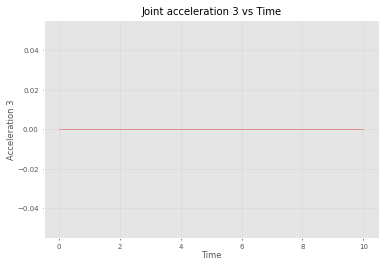

In [12]:
plt.title("Joint acceleration 3 vs Time")
plt.xlabel("Time")
plt.ylabel("Acceleration 3")
plt.plot(t,a3_d)

**Task** **3** PD controller

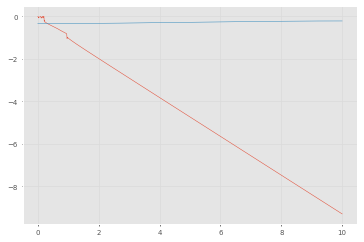

In [13]:
[theta1_int, theta2_int, d3_int] = scara_invkin(A[0],A[1],A[2],d1,d2) #intermediate joint variables
[x_int,y_int,z_int] = [-p*np.sin(theta1_int)-d2*np.sin(theta2_int),p*np.cos(theta1_int)+d2*np.cos(theta2_int),d1+d3_int]
[theta1_d,theta2_d,d3_d] = [theta1_f,theta2_f,d3_f]

x_act = [] #actual end effector positions for plotting and comparing purposes
y_act = []
z_act = []

x_dot = 0
y_dot = 0
z_dot = 0

#intial error values
prev_e1 = theta1_d - theta1_int
prev_e2 = theta2_d - theta2_int
prev_e3 = d3_d - d3_int

tstep = 0.01 #time step
Kp = 0.5
Kd = 1

plt.ion()
plt.show()

#while (theta1_int != theta1_d) or (theta2_int != theta2_d) or (d3_int != d3_d): #PD angle control for first joint variable
for i in range(len(t)):
  e1 = theta1_d - theta1_int
  tau1 = Kp*e1 + Kd*(e1-prev_e1)/(tstep)

  e2 = theta2_d - theta2_int
  tau2 = Kp*e2 + Kd*(e2-prev_e2)/(tstep)

  e3 = d3_d - d3_int
  tau3 = Kp*e3 + Kd*(e3-prev_e3)/(tstep)

  theta = J1 + d1**2*(m1/4+m2+m3)
  phi  = J2 + J3 + d2**2*(m2/4 + m3)
  psi = d1*d2*m3 + d1*d2*0.5*m2

  x_int = -p*np.sin(theta1_int) - d2*np.sin(theta2_int)
  y_int = p*np.cos(theta1_int) + d2*np.cos(theta2_int)
  z_int = d1 + d3_int

  u1 = -psi*np.sin(y_int)*y_dot*x_dot - psi*np.sin(y_int)*(x_dot + y_dot)*y_dot + tau1
  u2 = psi*np.sin(y_int)*x_dot**2 + tau2
  u3 = m3*9.8 + tau3

  M = np.array([[theta+phi+2*psi*np.cos(y_int),phi+2*psi*np.cos(y_int),0],[phi+2*psi*np.cos(y_int),phi,0],[0,0,m3]])
  C = np.array([[-psi*np.sin(y_int)*y_dot, -psi*np.sin(y_int)*(x_dot+y_dot),0],[psi*np.sin(y_int)*x_dot,0,0],[0,0,0]])

  G = np.transpose(np.array([0,0,m3*9.8]))
  U = np.transpose(np.array([u1,u2,u3]))
  K = U - np.matmul(C,np.transpose([x_dot,y_dot,z_dot])) - G

  d2y_dt2 = np.matmul(np.linalg.inv(M),K)

  x_dot = x_dot + d2y_dt2[0]*tstep
  y_dot = y_dot + d2y_dt2[1]*tstep
  z_dot = z_dot + d2y_dt2[2]*tstep

  x_int = x_dot*tstep + 0.5*d2y_dt2[0]*tstep**2
  y_int = y_dot*tstep + 0.5*d2y_dt2[1]*tstep**2
  z_int = z_dot*tstep + 0.5*d2y_dt2[2]*tstep**2

  x_act.append(x_int)
  y_act.append(y_int)
  z_act.append(z_int)

  [theta1_int, theta2_int, d3_int] = scara_invkin(x_int,y_int,z_int,d1,d2)

plt.plot(t,x_act)
plt.plot(t,x_d)

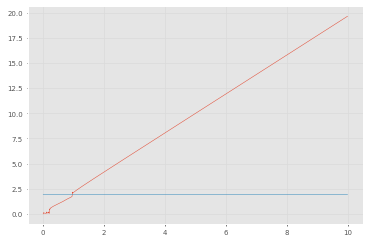

In [14]:
plt.plot(t,y_act)
plt.plot(t,y_d)

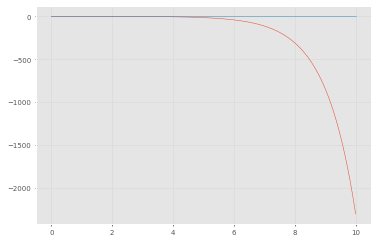

In [15]:
plt.plot(t,z_act)
plt.plot(t,z_d)

PD Control with feedforward control

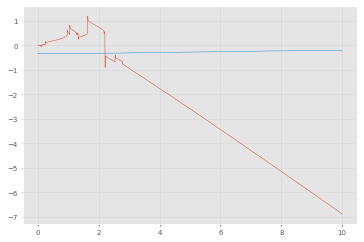

In [16]:
[theta1_int, theta2_int, d3_int] = scara_invkin(A[0],A[1],A[2],d1,d2) #intermediate joint variables
[x_int,y_int,z_int] = [-p*np.sin(theta1_int)-d2*np.sin(theta2_int),p*np.cos(theta1_int)+d2*np.cos(theta2_int),d1+d3_int]
[theta1_d,theta2_d,d3_d] = [theta1_f,theta2_f,d3_f]

x_act = [] #actual end effector positions for plotting and comparing purposes
y_act = []
z_act = []

x_dot = 0
y_dot = 0
z_dot = 0

#intial error values
prev_e1 = theta1_d - theta1_int
prev_e2 = theta2_d - theta2_int
prev_e3 = d3_d - d3_int

tstep = 0.01 #time step
Kp = 0.5
Kd = 1

plt.ion()
plt.show()

#while (theta1_int != theta1_d) or (theta2_int != theta2_d) or (d3_int != d3_d): #PD angle control for first joint variable
for i in range(len(t)):
  e1 = theta1_d - theta1_int
  tau1 = Kp*e1 + Kd*(e1-prev_e1)/(tstep) + theta1_int

  e2 = theta2_d - theta2_int
  tau2 = Kp*e2 + Kd*(e2-prev_e2)/(tstep) + theta2_int

  e3 = d3_d - d3_int
  tau3 = Kp*e3 + Kd*(e3-prev_e3)/(tstep) + d3_int

  theta = J1 + d1**2*(m1/4+m2+m3)
  phi  = J2 + J3 + d2**2*(m2/4 + m3)
  psi = d1*d2*m3 + d1*d2*0.5*m2

  x_int = -p*np.sin(theta1_int) - d2*np.sin(theta2_int)
  y_int = p*np.cos(theta1_int) + d2*np.cos(theta2_int)
  z_int = d1 + d3_int

  u1 = -psi*np.sin(y_int)*y_dot*x_dot - psi*np.sin(y_int)*(x_dot + y_dot)*y_dot + tau1
  u2 = psi*np.sin(y_int)*x_dot**2 + tau2
  u3 = m3*9.8 + tau3

  M = np.array([[theta+phi+2*psi*np.cos(y_int),phi+2*psi*np.cos(y_int),0],[phi+2*psi*np.cos(y_int),phi,0],[0,0,m3]])
  C = np.array([[-psi*np.sin(y_int)*y_dot, -psi*np.sin(y_int)*(x_dot+y_dot),0],[psi*np.sin(y_int)*x_dot,0,0],[0,0,0]])

  G = np.transpose(np.array([0,0,m3*9.8]))
  U = np.transpose(np.array([u1,u2,u3]))
  K = U - np.matmul(C,np.transpose([x_dot,y_dot,z_dot])) - G

  d2y_dt2 = np.matmul(np.linalg.inv(M),K)

  x_dot = x_dot + d2y_dt2[0]*tstep
  y_dot = y_dot + d2y_dt2[1]*tstep
  z_dot = z_dot + d2y_dt2[2]*tstep

  x_int = x_dot*tstep + 0.5*d2y_dt2[0]*tstep**2
  y_int = y_dot*tstep + 0.5*d2y_dt2[1]*tstep**2
  z_int = z_dot*tstep + 0.5*d2y_dt2[2]*tstep**2

  x_act.append(x_int)
  y_act.append(y_int)
  z_act.append(z_int)

  [theta1_int, theta2_int, d3_int] = scara_invkin(x_int,y_int,z_int,d1,d2)

plt.plot(t,x_act)
plt.plot(t,x_d)

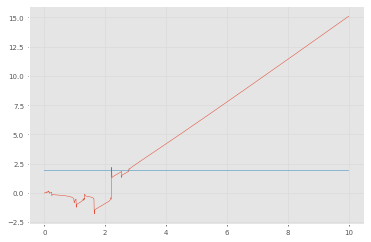

In [17]:
plt.plot(t,y_act)
plt.plot(t,y_d)

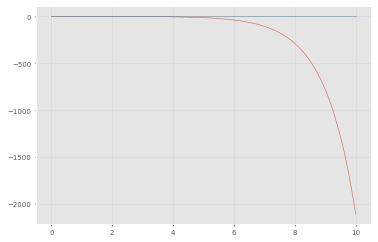

In [18]:
plt.plot(t,z_act)
plt.plot(t,z_d)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


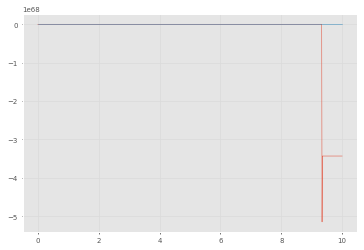

In [56]:
[theta1_int, theta2_int, d3_int] = scara_invkin(A[0],A[1],A[2],d1,d2) #intermediate joint variables
[theta1_prev,theta2_prev,d3_prev] = [theta1_int, theta2_int, d3_int]
[x_int,y_int,z_int] = [-p*np.sin(theta1_int)-d2*np.sin(theta2_int),p*np.cos(theta1_int)+d2*np.cos(theta2_int),d1+d3_int]
[theta1_d,theta2_d,d3_d] = [theta1_f,theta2_f,d3_f]
d2y_dt2 = [0,0,0]

x_act = [] #actual end effector positions for plotting and comparing purposes
y_act = []
z_act = []

x_dot = 0
y_dot = 0
z_dot = 0

#intial error values
prev_e1 = theta1_d - theta1_int
prev_e2 = theta2_d - theta2_int
prev_e3 = d3_d - d3_int

tstep = 0.01 #time step
Kp = 0.5
Kd = 1

plt.ion()
plt.show()

#while (theta1_int != theta1_d) or (theta2_int != theta2_d) or (d3_int != d3_d): #PD angle control for first joint variable
for i in range(len(t)):
  

  q1dot = (theta1_int - theta1_prev)/tstep
  q2dot = (theta2_int - theta2_prev)/tstep
  d3dot = (d3_int-d3_prev)/tstep

  q1ddot = (d2y_dt2[0]*np.sin(theta2_int)-p*np.sin(theta1_int)*np.sin(theta2_int)*q1dot-d2*np.sin(theta2_int)**2*q2dot-d2y_dt2[1]*np.cos(theta2_int)-p*np.cos(theta1_int)*np.cos(theta2_int)*q1dot-d2*np.cos(theta2_int)**2*q2dot)/(p*np.sin(theta1_int)*np.cos(theta2_int)-p*np.cos(theta1_int)*np.sin(theta2_int))
  q2ddot = (d2y_dt2[0]*np.sin(theta1_int)-p*np.sin(theta1_int)**2*q1dot - d2*np.sin(theta1_int)*np.sin(theta2_int)*q2dot-d2y_dt2[1]*np.cos(theta1_int)-p*np.cos(theta1_int)**2*q1dot-d2*np.cos(theta1_int)*np.cos(theta2_int)*q2dot)/(d2*np.cos(theta1_int)*np.sin(theta2_int)-d2*np.sin(theta1_int)*np.cos(theta2_int))
  d3dot = d2y_dt2[2]

  robot1 = rtb.DHRobot(
        [
            rtb.RevoluteDH(alpha=0, a=0.5, d=0.2, I=np.array([[1/6,1/12,0],[1/12,1/12,0],[0,0,0]]), m=1),
            rtb.RevoluteDH(alpha=np.pi, a=0.5, d=0, I=np.array([[1/6,1/12,0],[1/12,1/12,0],[0,0,0]]), m=1),
            rtb.PrismaticDH(theta=0, alpha=0, a=0, I=np.array([[1/6,1/12,0],[1/12,1/12,0],[0,0,0]]), m=1),
        ], name="scararob", gravity=[0, 0, 9.81])

  # Get D,C,phi
  D = robot1.inertia(np.array(np.transpose([theta1_int,theta2_int,d3_int])))
  C = robot1.coriolis(np.array([theta1_int,theta2_int,d3]),np.array([0,0,0]))
  phi = robot1.gravload(np.array(np.transpose([theta1_int,theta2_int,d3_int])))
  phi = np.reshape(phi, (3, 1))

  #computed torques
  dd1 = (D[0,0]*q1ddot + D[1,0]*q2ddot + D[2,0]*d2y_dt2[2]) + (C[0,0]*q1dot**2+ (C[0,1]+C[0,0])*q1dot*q2dot+C[0,1]*q2dot**2+ (C[0,2]+C[0,0])*q1dot*d3dot + (C[0,2]+C[0,1])*q2dot*d3dot + C[0,2]*d3dot**2) + phi[0]
  dd2 = (D[0,1]*q1ddot + D[1,1]*q2ddot + D[2,1]*d2y_dt2[2]) + (C[1,0]*q1dot**2+ (C[1,1]+C[1,0])*q1dot*q2dot+C[1,1]*q2dot**2+ (C[1,2]+C[1,0])*q1dot*d3dot + (C[1,2]+C[1,1])*q2dot*d3dot + C[1,2]*d3dot**2) + phi[1]
  dd3 = (D[0,2]*q1ddot + D[1,2]*q2ddot + D[2,2]*d2y_dt2[2]) + (C[2,0]*q1dot**2+ (C[2,1]+C[2,0])*q1dot*q2dot+C[2,1]*q2dot**2+ (C[2,2]+C[2,0])*q1dot*d3dot + (C[2,2]+C[2,1])*q2dot*d3dot + C[2,2]*d3dot**2) + phi[2]

  e1 = theta1_d - theta1_int
  tau1 = Kp*e1 + Kd*(e1-prev_e1)/(tstep) + theta1_int + dd1

  e2 = theta2_d - theta2_int
  tau2 = Kp*e2 + Kd*(e2-prev_e2)/(tstep) + theta2_int + dd2

  e3 = d3_d - d3_int
  tau3 = Kp*e3 + Kd*(e3-prev_e3)/(tstep) + d3_int + dd3

  theta1 = J1 + d1**2*(m1/4+m2+m3)
  phi1  = J2 + J3 + d2**2*(m2/4 + m3)
  psi = d1*d2*m3 + d1*d2*0.5*m2

  x_int = -p*np.sin(theta1_int) - d2*np.sin(theta2_int)
  y_int = p*np.cos(theta1_int) + d2*np.cos(theta2_int)
  z_int = d1 + d3_int

  u1 = -psi*np.sin(y_int)*y_dot*x_dot - psi*np.sin(y_int)*(x_dot + y_dot)*y_dot + tau1
  u2 = psi*np.sin(y_int)*x_dot**2 + tau2
  u3 = m3*9.8 + tau3

  M = [[theta1+phi1+2*psi*np.cos(y_int),phi1+2*psi*np.cos(y_int),0],[phi1+2*psi*np.cos(y_int),phi1,0],[0,0,m3]]
  C1 = np.array([[-psi*np.sin(y_int)*y_dot, -psi*np.sin(y_int)*(x_dot+y_dot),0],[psi*np.sin(y_int)*x_dot,0,0],[0,0,0]])

  G = np.transpose(np.array([0,0,m3*9.8]))
  U = np.transpose(np.array([u1,u2,u3]))
  K = U - np.matmul(C1,[x_dot,y_dot,z_dot]) - G

  d2y_dt2 = np.matmul(np.linalg.inv(M),np.transpose(K))
  d2y_dt2 = [np.asscalar(d2y_dt2[0]),np.asscalar(d2y_dt2[1]),np.asscalar(d2y_dt2[2])]

  x_dot = x_dot + d2y_dt2[0]*tstep
  y_dot = y_dot + d2y_dt2[1]*tstep
  z_dot = z_dot + d2y_dt2[2]*tstep

  x_int = x_dot*tstep + 0.5*d2y_dt2[0]*tstep**2
  y_int = y_dot*tstep + 0.5*d2y_dt2[1]*tstep**2
  z_int = z_dot*tstep + 0.5*d2y_dt2[2]*tstep**2

  x_act.append(x_int)
  y_act.append(y_int)
  z_act.append(z_int)

  [theta1_prev,theta2_prev,d3_prev] = [theta1_int,theta2_int,d3_int]

  [theta1_int, theta2_int, d3_int] = scara_invkin(x_int,y_int,z_int,d1,d2)
  #print(type(x_int))

plt.plot(t,x_act)
plt.plot(t,x_d)

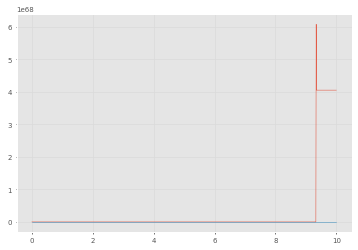

In [57]:
plt.plot(t,y_act)
plt.plot(t,y_d)

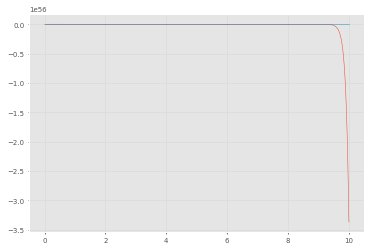

In [58]:
plt.plot(t,z_act)
plt.plot(t,z_d)